In [2]:
import sys 
# IMPORTANT: please edit this as needed
#       this allows loading in the itx_reader from the folder below, 
sys.path.append('/Users/shokawano/Box Sync/Zhang_Lab/code/sgp_analysis') 
import itx_reader.main as itx 

import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns 

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)

matplotlib.rcParams['text.usetex'] = False

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
path = '~/Box Sync/Zhang_Lab/code/sgp_analysis/data_processing/processed_data'
data = pd.read_feather(path + '/acsm_time_series.feather')

In [4]:
data.set_index('acsm_utc_time', inplace=True)
data

,Org,NH4,SO4,NO3,Chl
acsm_utc_time,,,,,
2011-01-01 00:00:00,0.105956,0.215098,0.121966,0.229458,0.003515
2011-01-01 00:30:00,0.060341,0.015342,0.239592,0.175130,0.009092
2011-01-01 01:00:00,0.376326,0.103007,0.133917,0.159480,0.012422
2011-01-01 01:30:00,0.172501,0.127982,0.096578,0.210620,0.006859
2011-01-01 02:00:00,0.198224,0.117998,0.104784,0.219591,0.009277
...,...,...,...,...,...
2017-10-27 18:30:00,NaN,NaN,NaN,NaN,NaN
2017-10-27 19:00:00,0.225487,0.131514,0.116280,0.022677,0.003093
2017-10-27 19:30:00,0.281446,0.112652,0.095330,0.016561,0.004474


In [5]:
data.index -=  pd.DateOffset(hours=6)
data

,Org,NH4,SO4,NO3,Chl
acsm_utc_time,,,,,
2010-12-31 18:00:00,0.105956,0.215098,0.121966,0.229458,0.003515
2010-12-31 18:30:00,0.060341,0.015342,0.239592,0.175130,0.009092
2010-12-31 19:00:00,0.376326,0.103007,0.133917,0.159480,0.012422
2010-12-31 19:30:00,0.172501,0.127982,0.096578,0.210620,0.006859
2010-12-31 20:00:00,0.198224,0.117998,0.104784,0.219591,0.009277
...,...,...,...,...,...
2017-10-27 12:30:00,NaN,NaN,NaN,NaN,NaN
2017-10-27 13:00:00,0.225487,0.131514,0.116280,0.022677,0.003093
2017-10-27 13:30:00,0.281446,0.112652,0.095330,0.016561,0.004474


In [6]:

# This function takes in plot_data & returns the data needed to create the image plot 
def data_for_img_plot(plot_data, chosen_species):
    return np.array(plot_data[chosen_species])

# this is to compare all the interpolations 
def mo_hr_img_plot_all_interpol(data, species, cmap='viridis'):
    
    data = data.copy()
    data['m'] = data.index.month
    data['h'] = data.index.hour

    data_mean = data.groupby([data.m, data.h],as_index=False).mean()
    data_median = data.groupby([data.m, data.h], as_index=False).median()

    gb_mean = data_mean.groupby([data_mean.m])  
    gb_median = data_median.groupby([data_median.m])

    # this is a list of 12 data frames for each month 
    # the DataFrame in plot_data_xx contain averages/median for each month & hour 
    plot_data_mean = [gb_mean.get_group(x) for x in gb_mean.groups]
    plot_data_median = [gb_median.get_group(x) for x in gb_median.groups]

    plot_data_mean_np = np.array(list(map(lambda x: data_for_img_plot(x, species), plot_data_mean)))
    plot_data_median_np = np.array(list(map(lambda x: data_for_img_plot(x, species), plot_data_median)))
    
    
    plt.rcParams['figure.figsize'] = (20, 10)

    fig, axs = plt.subplots(nrows=2, ncols=3,  sharey='row')
    fig.subplots_adjust(wspace=0)
    ex = [0, 24, 0, 12]
    
    data_sets = [plot_data_mean_np, plot_data_median_np]
    interpolations = ['none', 'bilinear', 'bicubic']
    data_descrip = ['Average', 'Median']
    
    
    for row in range(2):
        
        for col in range(3):
            dset = data_sets[row]
            interp = interpolations[col]
            ax = axs[row, col]
            descrip = data_descrip[row]
            
            contours = ax.contour(dset, 3, extent=ex, colors='white', alpha=0.5)
            ax.clabel(contours, inline=True, fontsize=8, fmt='%1.1f')
            
            im = ax.imshow(dset, origin='lower', cmap=cmap, 
                      interpolation=interp, extent=ex)
            
            ax.xaxis.set_major_locator(plt.MaxNLocator(6))
            ax.set(title=descrip + ' | Interpolation:' + interp.capitalize(), xlabel='Hours in a Day (Hr Beginning)')
            

            ax.set_yticks(np.arange(0, 13))
            ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                              'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                              'Nov', 'Dec', 'Jan'])
            
        
            plt.colorbar(im, ax=axs[row, col], shrink=0.8,  orientation='horizontal')
                
    return plt.gcf(), plt.gca()


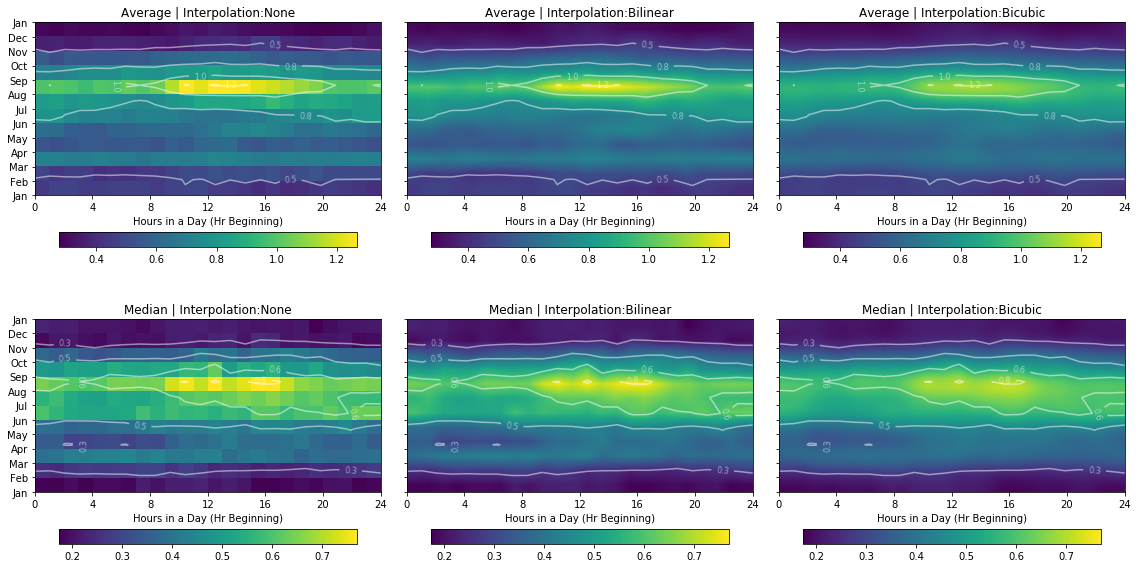

In [7]:
chosen_species = 'SO4'

fig, ax = mo_hr_img_plot_all_interpol(data, chosen_species)
#plt.savefig('img_plots/grid/' + chosen_species + '.png', dpi=300, bbox_inches='tight')
plt.show()

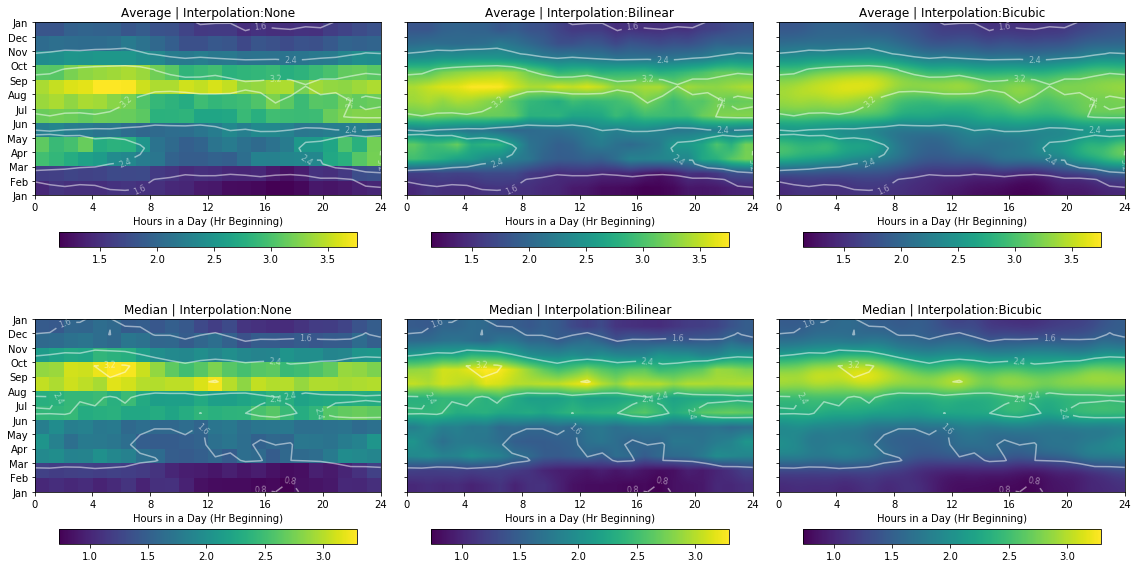

In [8]:
chosen_species = 'Org'

fig, ax = mo_hr_img_plot_all_interpol(data, chosen_species)
#plt.savefig('img_plots/grid/' + chosen_species + '.png', dpi=300, bbox_inches='tight')
plt.show()